In [1]:
import matplotlib.pyplot as plt

from mdsystems import atoms, spatial


### Loading Coordinates

In [15]:
OH = atoms.System(
    "data/test.xtc",
    top="data/test.gro",
    top_filter="name O2",
    xyz_filter="x**2 + y**2 < 5.0",
    chunk_size=100,
    stride_len=0,
)

for i, frame in enumerate(OH.load_cartesian(com=False)):
    print(f"Number of atoms matching filters in frame {i}: ", len(frame))
    print(f"First 10 coordinates in frame {i}:\n", frame[:10])

    if i > 10:
        break

Number of atoms matching filters in frame 0:  97
First 10 coordinates in frame 0:
 [[0.55700004 1.1980001  4.5020003 ]
 [0.007      0.748      1.033     ]
 [0.363      0.531      5.3820004 ]
 [1.57       0.50600004 4.262     ]
 [0.531      0.70500004 4.0670004 ]
 [1.631      0.57500005 5.7260003 ]
 [1.116      0.56200004 6.0940003 ]
 [0.11800001 0.781      0.31      ]
 [0.24200001 1.3570001  1.133     ]
 [0.97800004 1.4940001  1.4460001 ]]
Number of atoms matching filters in frame 1:  98
First 10 coordinates in frame 1:
 [[1.5430001  1.5220001  1.0830001 ]
 [0.74600005 1.2950001  4.564     ]
 [0.48200002 0.52000004 5.42      ]
 [1.6330001  0.522      4.289     ]
 [0.70900005 0.88900006 4.117     ]
 [1.593      0.59400004 5.92      ]
 [1.072      0.65400004 6.116     ]
 [0.119      0.77500004 0.268     ]
 [0.22500001 1.3310001  1.189     ]
 [0.901      1.4610001  1.5020001 ]]
Number of atoms matching filters in frame 2:  104
First 10 coordinates in frame 2:
 [[0.74       1.217      4.48

### Radial Distribution Function

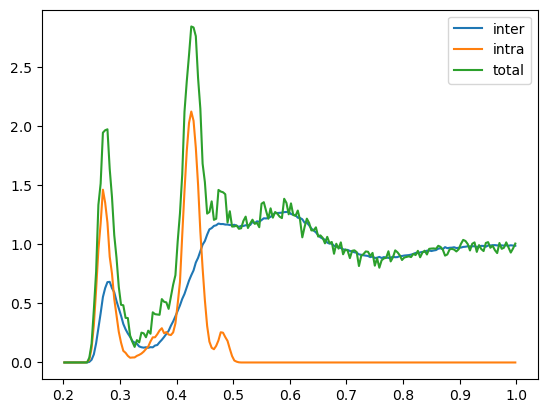

In [11]:
OH = atoms.System("data/test.xtc", top="data/test.gro", top_filter="name O2")
OE = atoms.System("data/test.xtc", top="data/test.gro", top_filter="name O12")

RDF = spatial.RadialDistribution(sys_a=OH, sys_b=OE, min_dist=0.2, max_dist=1.0, num_bins=200)
inter, bins = RDF.run(mode="inter", stride=1, com=False, unique=True)
intra, bins = RDF.run(mode="intra", stride=10, com=False, unique=True)
total, bins = RDF.run(mode="total", stride=100, com=False, unique=True)
# com, bins = RDF.run(mode="total", stride=100, com=True, unique=True)

plt.plot(bins, inter, label="inter")
plt.plot(bins, intra, label="intra")
plt.plot(bins, total, label="total")
# plt.plot(bins, com, label="com total")
plt.legend()